## IMPORT LIBRARIES AND LOAD DATASET

In [1]:
import pandas as pd
import numpy as np 

from matplotlib import pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler, Normalizer

In [2]:
raw_df = pd.read_csv('raw_data/healthcare-dataset-stroke-data.csv', sep=',')

## RETRIVE DATASET INFORMATION

In [10]:
# Dataset Shape

raw_df.shape

(5110, 12)

In [11]:
# Column names and types

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [12]:
# Head or Tail of the Dataset

raw_df.head(5)
#raw_df.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [478]:
# Statistics information

raw_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [489]:
# Find Duplicates

id_feature = 'id'
print(f'Shape: {raw_df.shape}\nTotal ID: {raw_df.nunique()[id_feature]}')

duplicate_rows_df = raw_df[raw_df.duplicated()]
print("Number of duplicated rows:", duplicate_rows_df.shape[0])

Shape: (5110, 12)
Total ID: 5110
Number of duplicated rows: 0


In [3]:
# Revise and Count unique values

# Remove continuous features, id and age
columns = raw_df.columns
columns=columns.drop(['id', 'age', 'avg_glucose_level', 'bmi'])
#columns

for column in columns:
    #print(raw_df.loc[:,column].unique())
    print(raw_df.loc[:,column].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
hypertension
0    4612
1     498
Name: count, dtype: int64
heart_disease
0    4834
1     276
Name: count, dtype: int64
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
stroke
0    4861
1     249
Name: count, dtype: int64


In [491]:
# First Analysis about patients to drop:
    # "Others" in gender because it has just one istance 
    # "Unkown" is a category in smoking_status that has 1544 istances, we have two options:
        # As you can see below, those are almost all patients without stroke (stroke = 0)
        # Drop everyone because it's a tricky value, but we would loose a lot of information
        # Continue as normal and we compare the results from these two options.

for column in columns:
    if column != 'smoking_status':
        print(f"Values in column:{column}")
        print(raw_df[raw_df['smoking_status'] == "Unknown"].loc[:,column].value_counts())

Values in column:gender
gender
Female    836
Male      708
Name: count, dtype: int64
Values in column:hypertension
hypertension
0    1492
1      52
Name: count, dtype: int64
Values in column:heart_disease
heart_disease
0    1496
1      48
Name: count, dtype: int64
Values in column:ever_married
ever_married
No     901
Yes    643
Name: count, dtype: int64
Values in column:work_type
work_type
Private          640
children         618
Self-employed    156
Govt_job         122
Never_worked       8
Name: count, dtype: int64
Values in column:Residence_type
Residence_type
Urban    782
Rural    762
Name: count, dtype: int64
Values in column:stroke
stroke
0    1497
1      47
Name: count, dtype: int64


## MANAGE NAN VALUES

In [496]:
raw_df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [495]:
# Only bmi has NaN values, so how are they related to stroke feature?

print(raw_df[raw_df['bmi'].isna()].loc[:,"stroke"].value_counts())

stroke
0    161
1     40
Name: count, dtype: int64


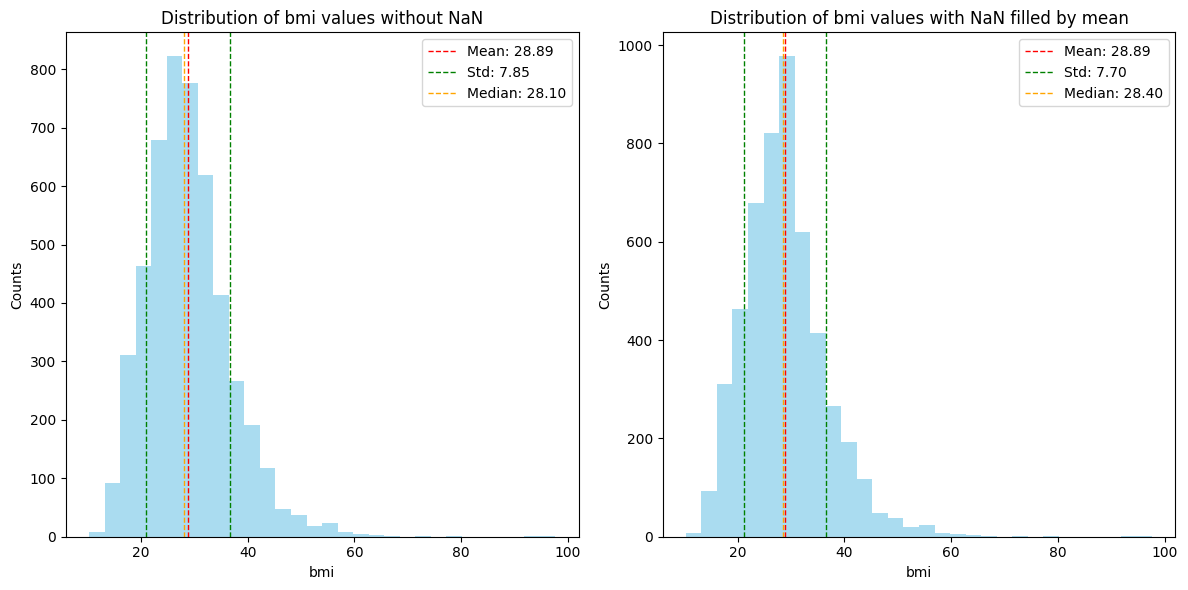

In [497]:
# NaN are all in bmi feature, before decide the filling method I need to visualize these vales

feature_to_viz = "bmi"

# Calculate statistics about this feature without NaN
feature_values_no_NaN = raw_df[feature_to_viz].dropna()
mean = feature_values_no_NaN.mean()
std = feature_values_no_NaN.std()
median = feature_values_no_NaN.median()

# Plot distribution side by side without NaN values and filled with mean or median value
plt.figure(figsize=(12,6))

# Without NaN values
plt.subplot(1,2,1)

# Add vertical lines for mean, std, and median
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(mean + std, color='green', linestyle='dashed', linewidth=1, label=f'Std: {std:.2f}')
plt.axvline(mean - std, color='green', linestyle='dashed', linewidth=1)
plt.axvline(median, color='orange', linestyle='dashed', linewidth=1, label=f'Median: {median:.2f}')

plt.legend()

plt.hist(feature_values_no_NaN, bins = 30, color='skyblue', alpha=0.7)
plt.title("Distribution of bmi values without NaN")
plt.xlabel("bmi")
plt.ylabel('Counts')

# Plot with NaN values filled with mean value (same analysis could be done with median)
filled_NaN = raw_df.copy()
filled_NaN[feature_to_viz].fillna(mean, inplace=True)
plt.subplot(1,2,2)

plt.hist(filled_NaN[feature_to_viz], bins=30, color='skyblue', alpha=0.7)
plt.axvline(filled_NaN[feature_to_viz].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {filled_NaN[feature_to_viz].mean():.2f}')
plt.axvline(filled_NaN[feature_to_viz].mean() + filled_NaN[feature_to_viz].std(), color='green', linestyle='dashed', linewidth=1, label=f'Std: {filled_NaN[feature_to_viz].std():.2f}')
plt.axvline(filled_NaN[feature_to_viz].mean() - filled_NaN[feature_to_viz].std(), color='green', linestyle='dashed', linewidth=1)
plt.axvline(filled_NaN[feature_to_viz].median(), color='orange', linestyle='dashed', linewidth=1, label=f'Median: {filled_NaN[feature_to_viz].median():.2f}')

plt.legend()

plt.title("Distribution of bmi values with NaN filled by mean")
plt.xlabel("bmi")
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [4]:
# Conclusion for the missing values:
    # Fill NaN values for bmi feature with mean value
    # Drop Other in gender feature
    # Drop id column 
    # Try both options for Unknown category in smoking_status feature: with or without

df = raw_df.copy()
df["bmi"].fillna(df["bmi"].mean(), inplace=True)
df.drop(df[df["gender"]=="Other"].index, inplace=True)
df.drop('id', axis=1, inplace=True)

print(f'New Shape: {df.shape}')

#df.drop(df[df['smoking_status']=='Unknown'].index, inplace=True)

New Shape: (5109, 11)


## DATA VISUALIZATION

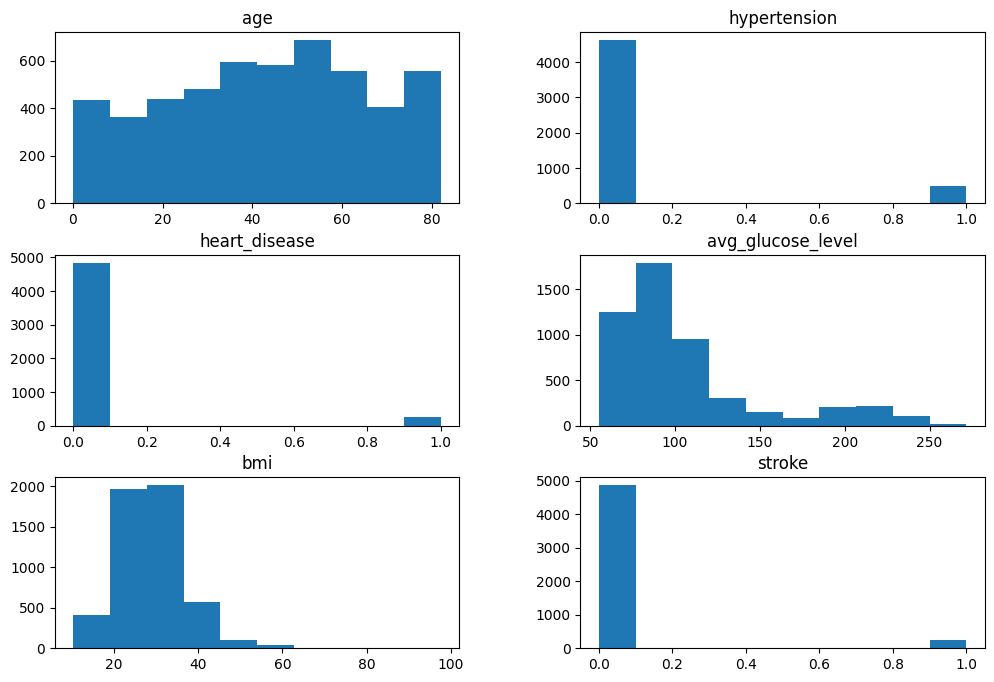

In [500]:
#General view for some features: histograms
 
df.hist(figsize=(12, 8), grid=False)
plt.show()

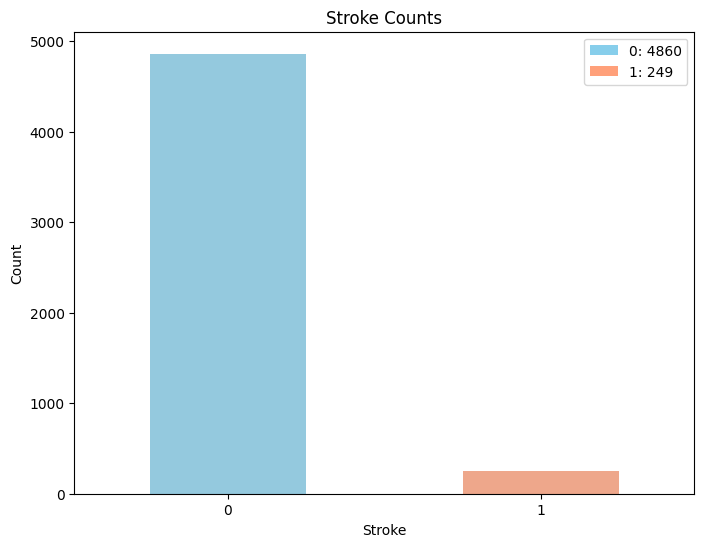

In [530]:
# Count Plot for stroke: it is clear we have an unbalanced dataset
# This is an issue we will discuss later

# Calculate counts for each option
counts = df['stroke'].value_counts()

# Define colors for each option
colors = {0: 'skyblue', 1: 'lightsalmon'}

fig = plt.figure(figsize=(8,6))
sns.countplot(df, x='stroke',hue='stroke', palette=colors.values(), legend=False, width=0.5)
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title('Stroke Counts')

# Add Legend
for i, (count, color) in enumerate(zip(counts, colors.values())):
    plt.bar(i, 0, color=color, label=f'{i}: {count}')

plt.legend(loc='upper right')
plt.show()

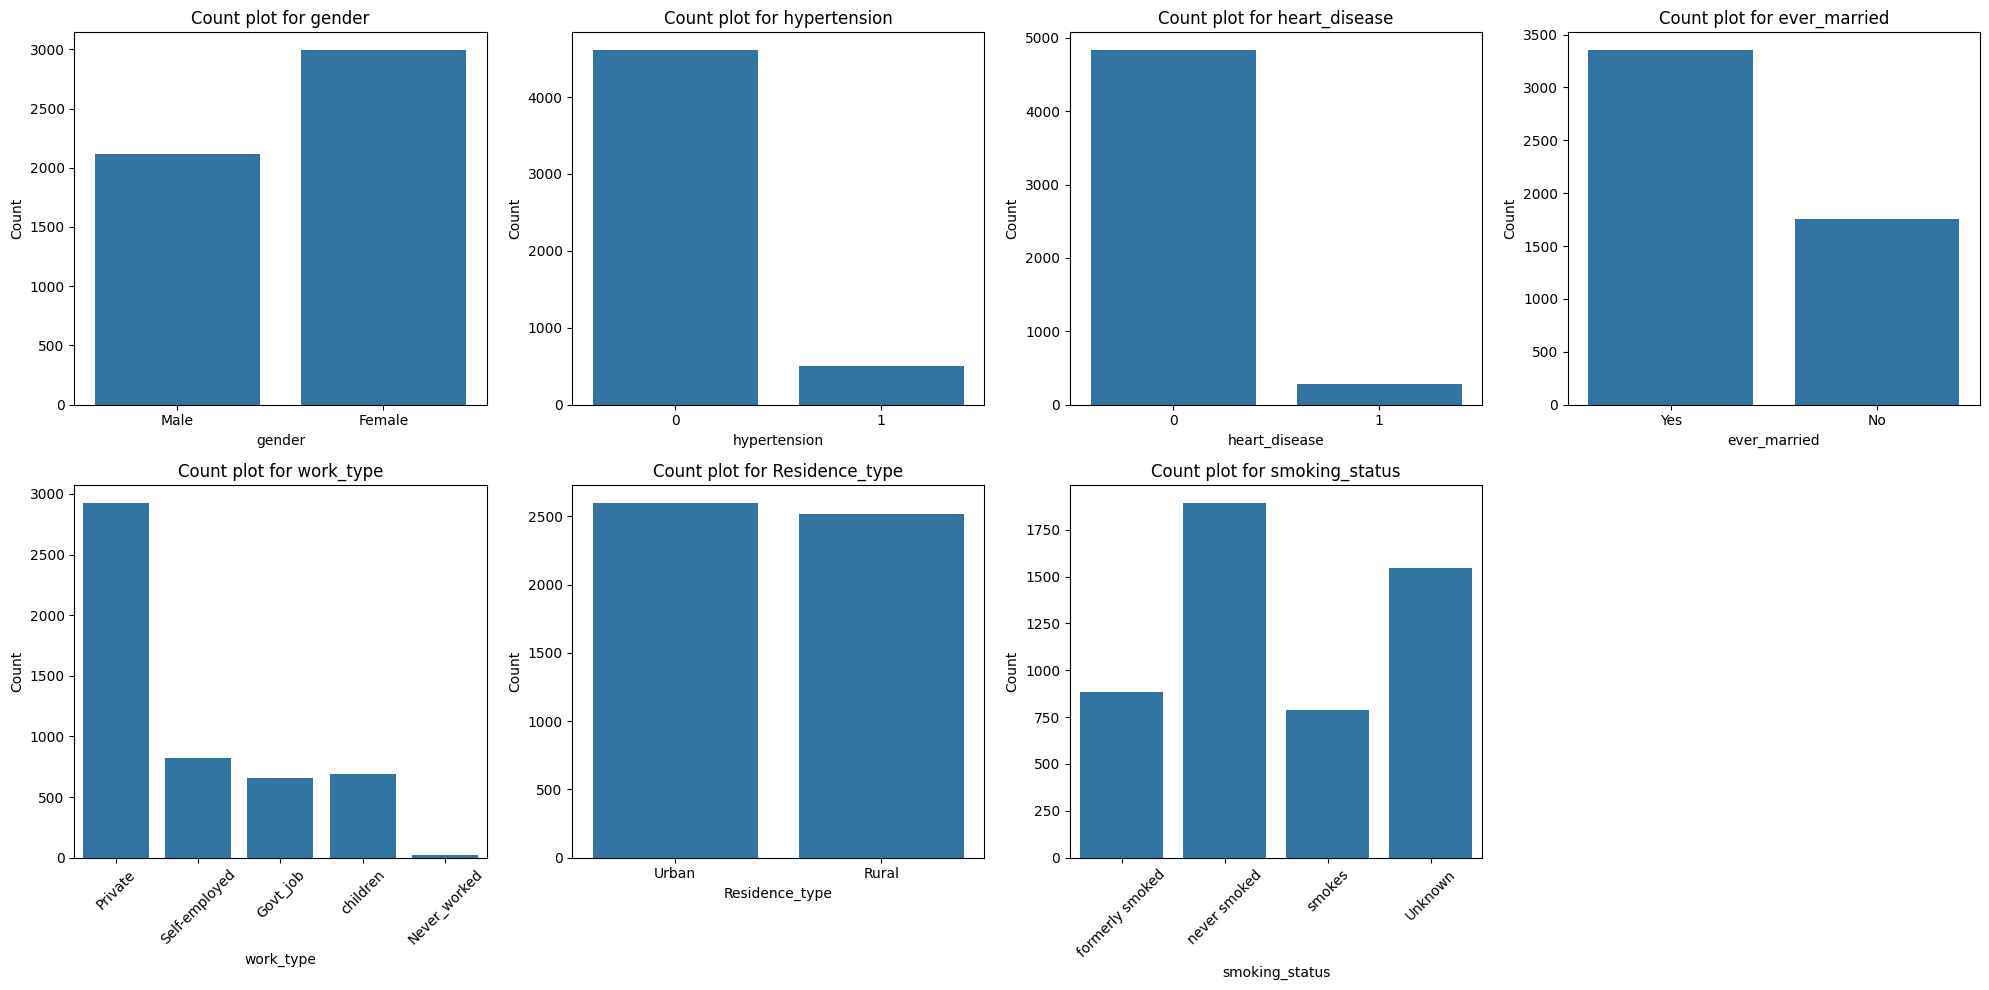

In [534]:
# Bar plots for categorical features: excluding target feature (stroke) and including discrete features

categorical_features = df.drop('stroke', axis=1).select_dtypes(include=['object', 'int']).columns

# Calculate the number of rows and columns for subplots
num_rows = 2
num_cols = (len(categorical_features) + num_rows - 1) // num_rows

fig, axes = plt.subplots(num_rows,num_cols, figsize=(20,10))

axes = axes.flatten()

# Iteration for each categorical feature
for i,column in enumerate(categorical_features):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f"Count plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    if column == "work_type" or column == "smoking_status":
        axes[i].tick_params(axis='x', rotation = 45)

# Hide any unused subplots
for j in range(len(categorical_features), num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

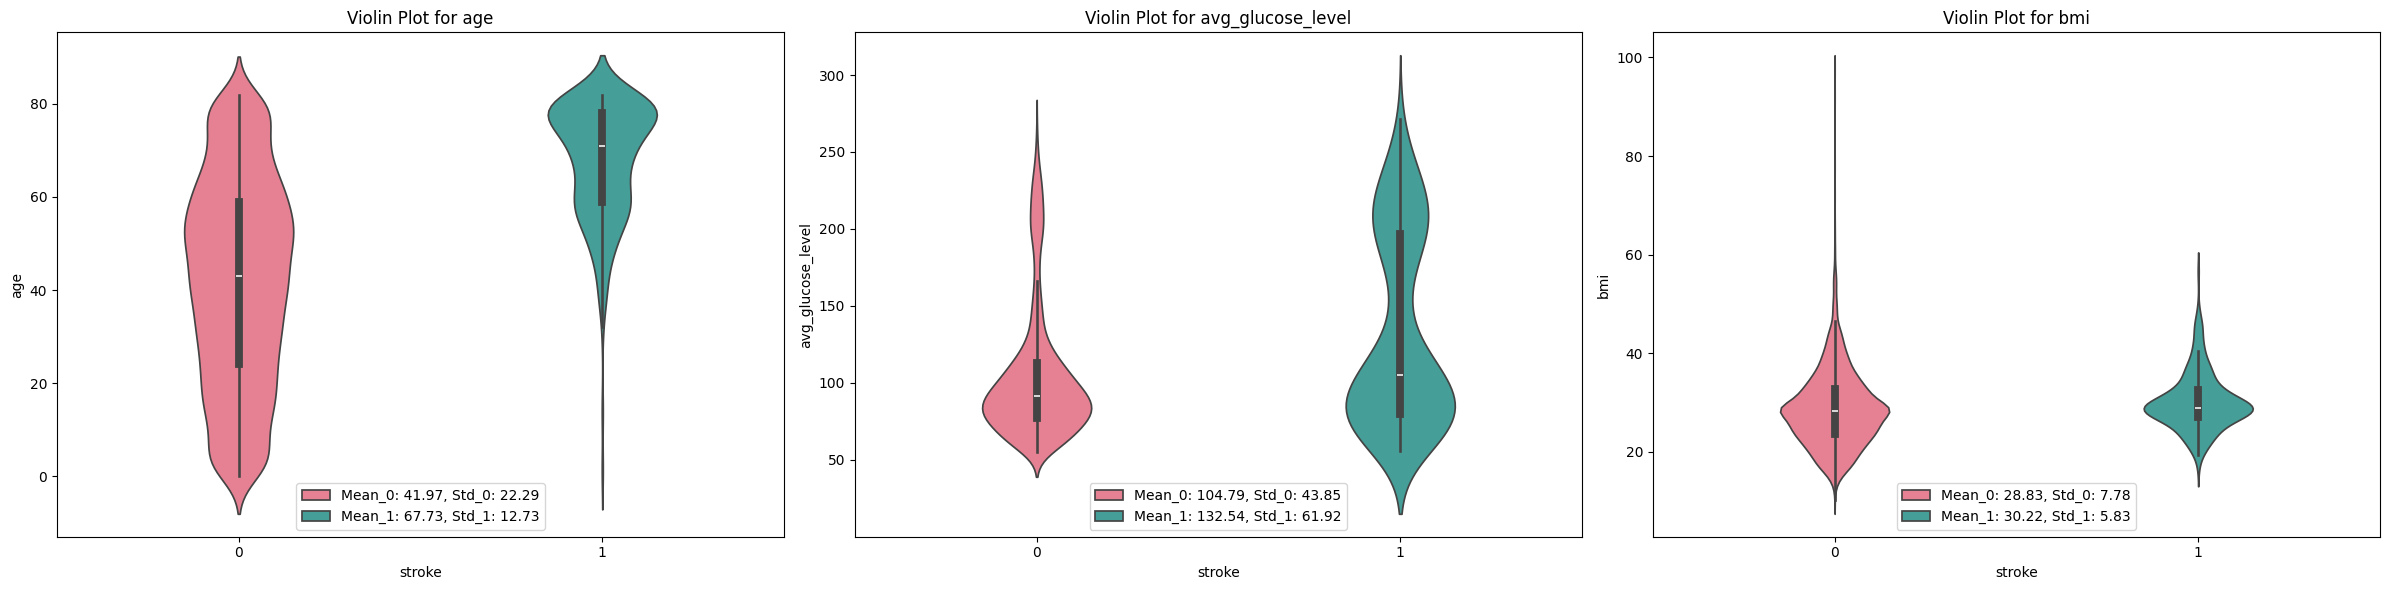

In [537]:
# Distribution of numerical feature according to stroke using Violin Plots

# Define all the columns except stoke
numerical_columns = df.select_dtypes(exclude=['object', 'int']).columns

# Calculate the number of rows and columns for subplots
num_rows = 1
num_cols = (len(numerical_columns) + num_rows - 1) // num_rows

# Create a figure with 3 subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(24,6))

axes = axes.flatten()

# Iterate over each numerical column and plot a boxplot
for i, column in enumerate(numerical_columns):

    sns.violinplot(data=df, x='stroke', y=column, ax=axes[i], hue='stroke', palette='husl'
                , width=0.3
                )
    axes[i].set_title(f"Violin Plot for {column}")
    axes[i].set_xlabel("stroke")
    axes[i].set_ylabel(column)

    # Calculate mean and standard deviation
    mean_value = df.groupby('stroke')[column].mean()
    std_value = df.groupby('stroke')[column].std()
    
    # Add legend with mean and standard deviation
    legend_handles, _ = axes[i].get_legend_handles_labels()
    legend = axes[i].legend(labels=[f"Mean_0: {mean_value[0]:.2f}, Std_0: {std_value[0]:.2f}",
                                              f"Mean_1: {mean_value[1]:.2f}, Std_1: {std_value[1]:.2f}"],
                                              handles=legend_handles, loc='lower center')

plt.tight_layout()
plt.show()


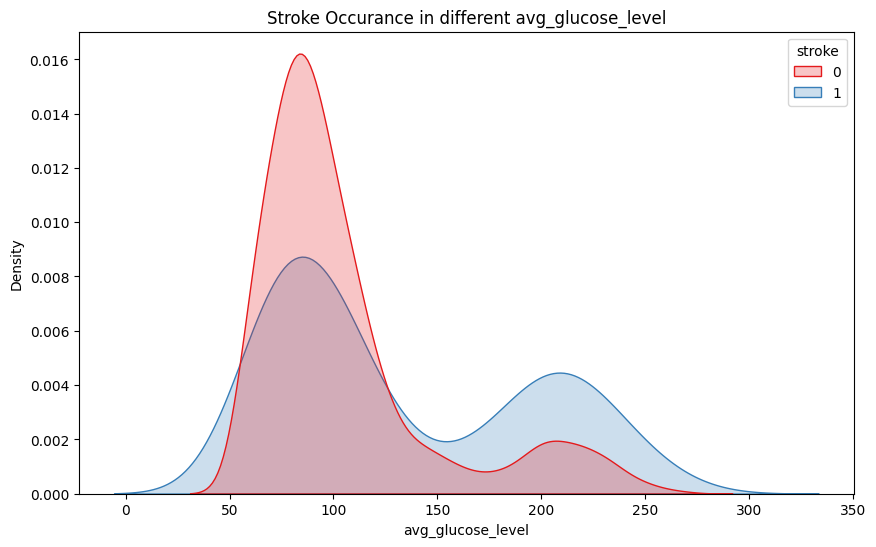

In [562]:
# Density plot of one feature for each 'stroke' category in order to have a deeper view

# Chose your feature
feature = 'avg_glucose_level'

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=feature, hue='stroke', fill=True, common_norm=False, palette="Set1")
plt.title(f'Stroke Occurance in different {feature}')
plt.xlabel(f'{feature}')
plt.ylabel('Density')

plt.show()

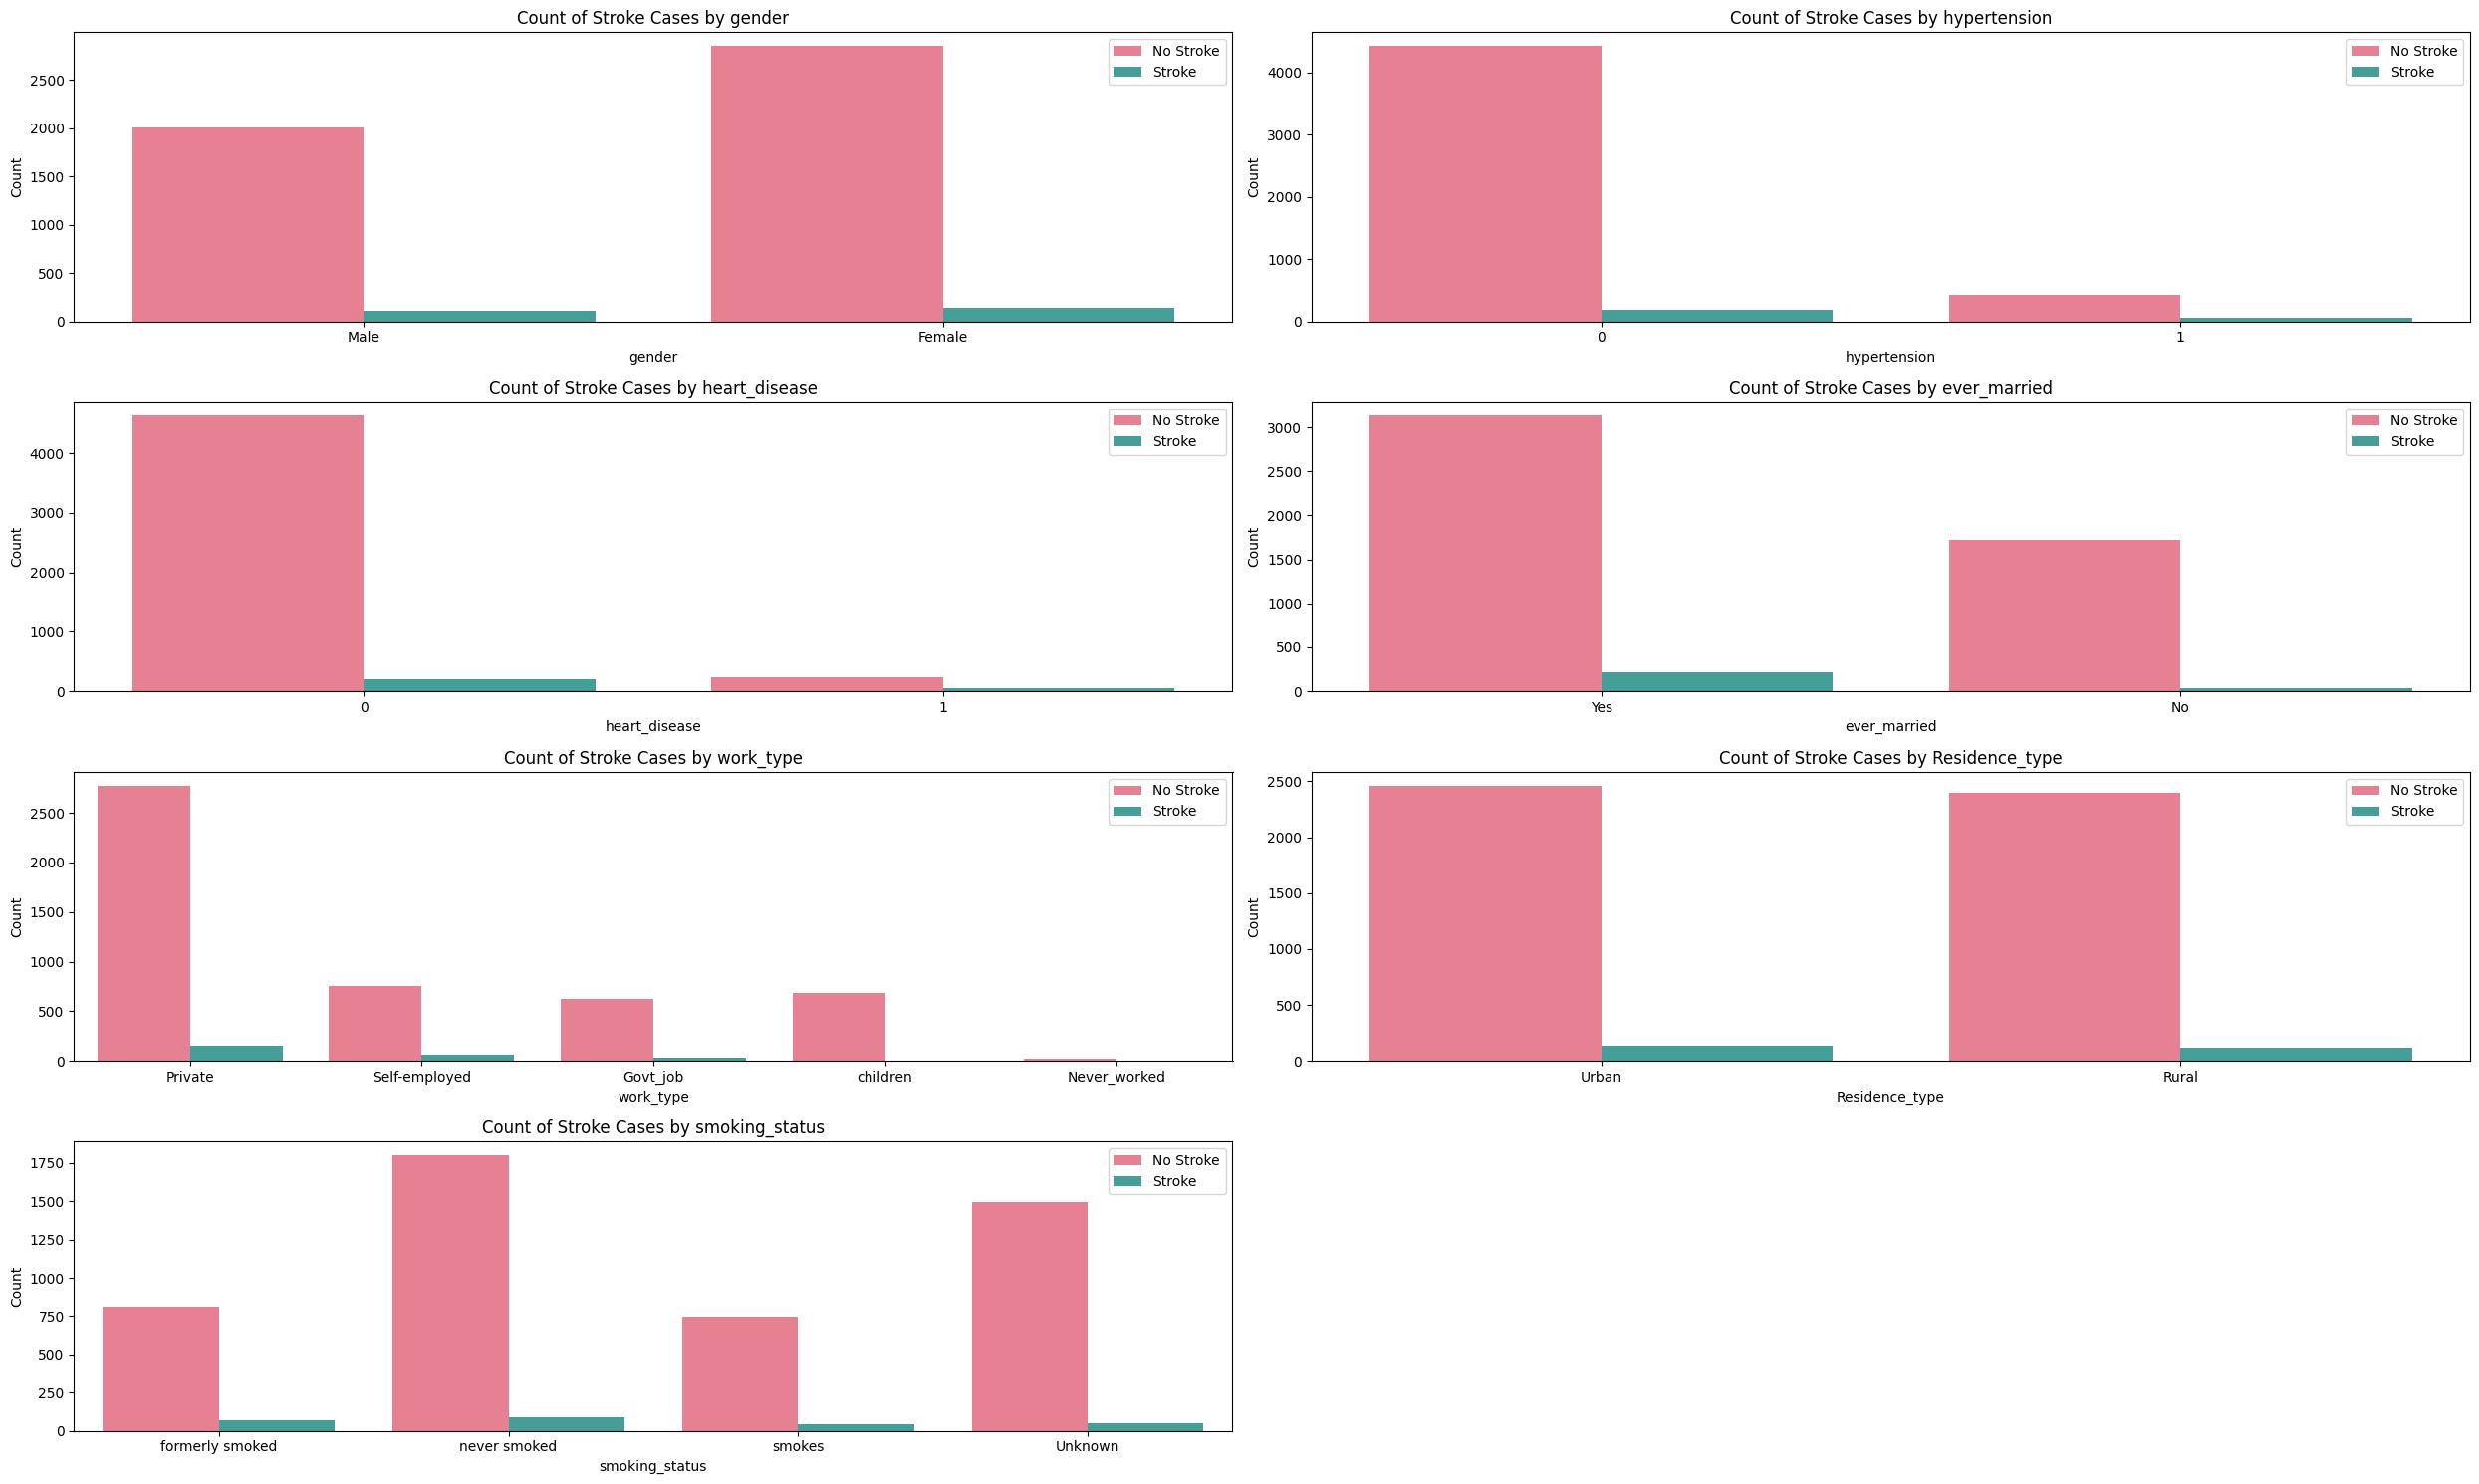

In [538]:
# How categorical features are distributed according to stroke using Count Plots

# Define the categorical features you want to evaluate
categorical_features = df.drop("stroke", axis=1).select_dtypes(include=['object', 'int']).columns

# Calculate the number of rows and columns for subplots
num_cols = 2
num_rows = (len(categorical_features) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 15))

axes = axes.flatten()

# Iterate over each categorical feature
for i, cat_feature in enumerate(categorical_features):
    # Create a countplot
    sns.countplot(data=df, x=cat_feature, hue='stroke', palette="husl", ax=axes[i])
    axes[i].set_title(f"Count of Stroke Cases by {cat_feature}")
    axes[i].set_xlabel(cat_feature)
    axes[i].set_ylabel("Count")
    axes[i].legend(labels=["No Stroke", "Stroke"])

# Hide any unused subplots
for j in range(len(categorical_features), num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [540]:
# Counts Table for each categorical feature options according to stroke

# Define the categorical features
categorical_features = df.drop('stroke', axis=1).select_dtypes(include=['object', 'int']).columns

# Create an empty dictionary to store the counts
counts_dict = {}

# Iterate over each categorical feature
for feature in categorical_features:
    # Count occurrences of each category for both stroke and non-stroke cases
    counts = df.groupby([feature, 'stroke']).size().unstack(fill_value=0)
    counts.columns = ['No Stroke', 'Stroke']
    # Store the counts in the dictionary
    counts_dict[feature] = counts

counts_df = pd.concat(counts_dict.values(), keys=counts_dict.keys(), axis=1)

counts_df

gender        hypertension        heart_disease         \
                No Stroke Stroke    No Stroke Stroke     No Stroke Stroke   
Female             2853.0  141.0          NaN    NaN           NaN    NaN   
Male               2007.0  108.0          NaN    NaN           NaN    NaN   
0                     NaN    NaN       4428.0  183.0        4631.0  202.0   
1                     NaN    NaN        432.0   66.0         229.0   47.0   
No                    NaN    NaN          NaN    NaN           NaN    NaN   
Yes                   NaN    NaN          NaN    NaN           NaN    NaN   
Govt_job              NaN    NaN          NaN    NaN           NaN    NaN   
Never_worked          NaN    NaN          NaN    NaN           NaN    NaN   
Private               NaN    NaN          NaN    NaN           NaN    NaN   
Self-employed         NaN    NaN          NaN    NaN           NaN    NaN   
children              NaN    NaN          NaN    NaN           NaN    NaN   
Rural                 NaN    NaN          NaN    NaN           NaN    NaN   
Urban                 NaN    NaN          NaN    NaN           NaN    NaN   
Unknown               NaN    NaN          NaN    NaN           NaN    NaN   
formerly smoked       NaN    NaN          NaN    NaN           NaN    NaN   
never smoked          NaN    NaN          NaN    NaN           NaN    NaN   
smokes                NaN    NaN          NaN    NaN           NaN    NaN   

                ever_married        work_type        Residence_type         \
                   No Stroke Stroke No Stroke Stroke      No Stroke Stroke   
Female                   NaN    NaN       NaN    NaN            NaN    NaN   
Male                     NaN    NaN       NaN    NaN            NaN    NaN   
0                        NaN    NaN       NaN    NaN            NaN    NaN   
1                        NaN    NaN       NaN    NaN            NaN    NaN   
No                    1727.0   29.0       NaN    NaN            NaN    NaN   
Yes                   3133.0  220.0       NaN    NaN            NaN    NaN   
Govt_job                 NaN    NaN     624.0   33.0            NaN    NaN   
Never_worked             NaN    NaN      22.0    0.0            NaN    NaN   
Private                  NaN    NaN    2775.0  149.0            NaN    NaN   
Self-employed            NaN    NaN     754.0   65.0            NaN    NaN   
children                 NaN    NaN     685.0    2.0            NaN    NaN   
Rural                    NaN    NaN       NaN    NaN         2399.0  114.0   
Urban                    NaN    NaN       NaN    NaN         2461.0  135.0   
Unknown                  NaN    NaN       NaN    NaN            NaN    NaN   
formerly smoked          NaN    NaN       NaN    NaN            NaN    NaN   
never smoked             NaN    NaN       NaN    NaN            NaN    NaN   
smokes                   NaN    NaN       NaN    NaN            NaN    NaN   

                smoking_status         
                     No Stroke Stroke  
Female                     NaN    NaN  
Male                       NaN    NaN  
0                          NaN    NaN  
1                          NaN    NaN  
No                         NaN    NaN  
Yes                        NaN    NaN  
Govt_job                   NaN    NaN  
Never_worked               NaN    NaN  
Private                    NaN    NaN  
Self-employed              NaN    NaN  
children                   NaN    NaN  
Rural                      NaN    NaN  
Urban                      NaN    NaN  
Unknown                 1497.0   47.0  
formerly smoked          814.0   70.0  
never smoked            1802.0   90.0  
smokes                   747.0   42.0

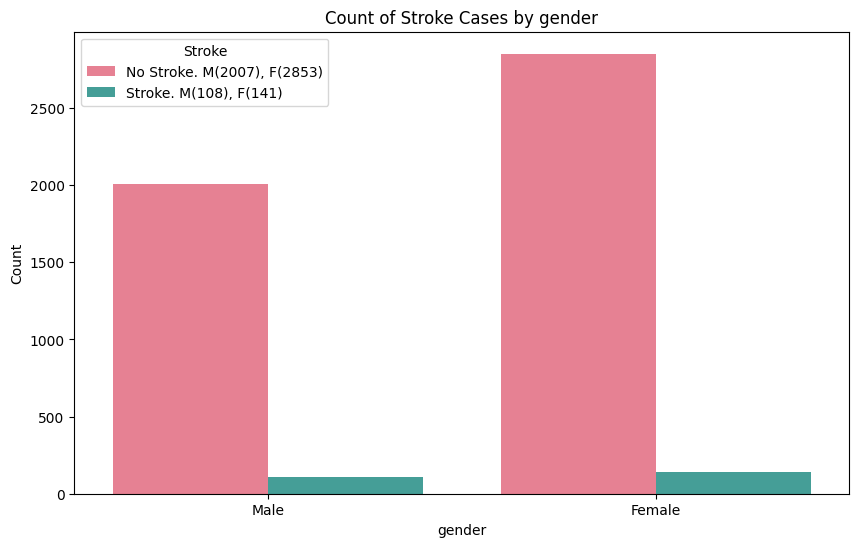

In [541]:
# Visualize in detail one of those plots
# Example for Gender

# Define the categorical feature you want to evaluate
categorical_feature = 'gender'

# Calculate stroke and non-stroke counts for each category in the categorical feature
stroke_counts = df.groupby([categorical_feature, 'stroke']).size().unstack(fill_value=0)
stroke_counts.columns = ['No Stroke', 'Stroke']

# Create a Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=categorical_feature, hue='stroke', palette="husl")
plt.title(f"Count of Stroke Cases by {categorical_feature}")
plt.xlabel(categorical_feature)
plt.ylabel("Count")

plt.legend(title="Stroke", labels=[f"No Stroke. M({stroke_counts.iloc[1,0]}), F({stroke_counts.iloc[0,0]})"
                                   , f"Stroke. M({stroke_counts.iloc[1,1]}), F({stroke_counts.iloc[0,1]})"])
plt.show()


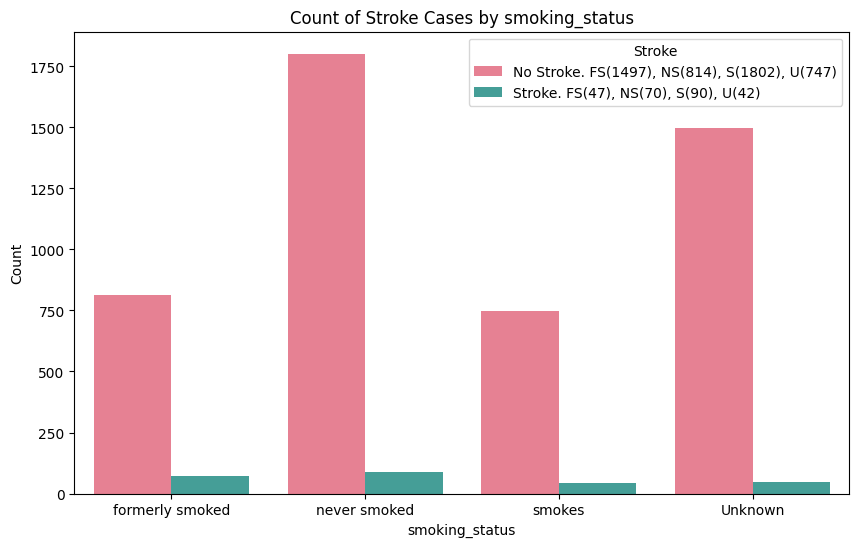

In [542]:
# Example for Smoking Status

# Define the categorical feature you want to evaluate
categorical_feature = 'smoking_status'

# Calculate stroke and non-stroke counts for each category in the categorical feature
stroke_counts = df.groupby([categorical_feature, 'stroke']).size().unstack(fill_value=0)
stroke_counts.columns = ['No Stroke', 'Stroke']

# Create a Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=categorical_feature, hue='stroke', palette="husl")
plt.title(f"Count of Stroke Cases by {categorical_feature}")
plt.xlabel(categorical_feature)
plt.ylabel("Count")

plt.legend(title="Stroke", labels=[f"No Stroke. FS({stroke_counts.iloc[0,0]}), NS({stroke_counts.iloc[1,0]}), S({stroke_counts.iloc[2,0]}), U({stroke_counts.iloc[3,0]})"
                                   , f"Stroke. FS({stroke_counts.iloc[0,1]}), NS({stroke_counts.iloc[1,1]}), S({stroke_counts.iloc[2,1]}), U({stroke_counts.iloc[3,1]})"])
plt.show()


## OUTLIERS DETECTION AND REMOVAL

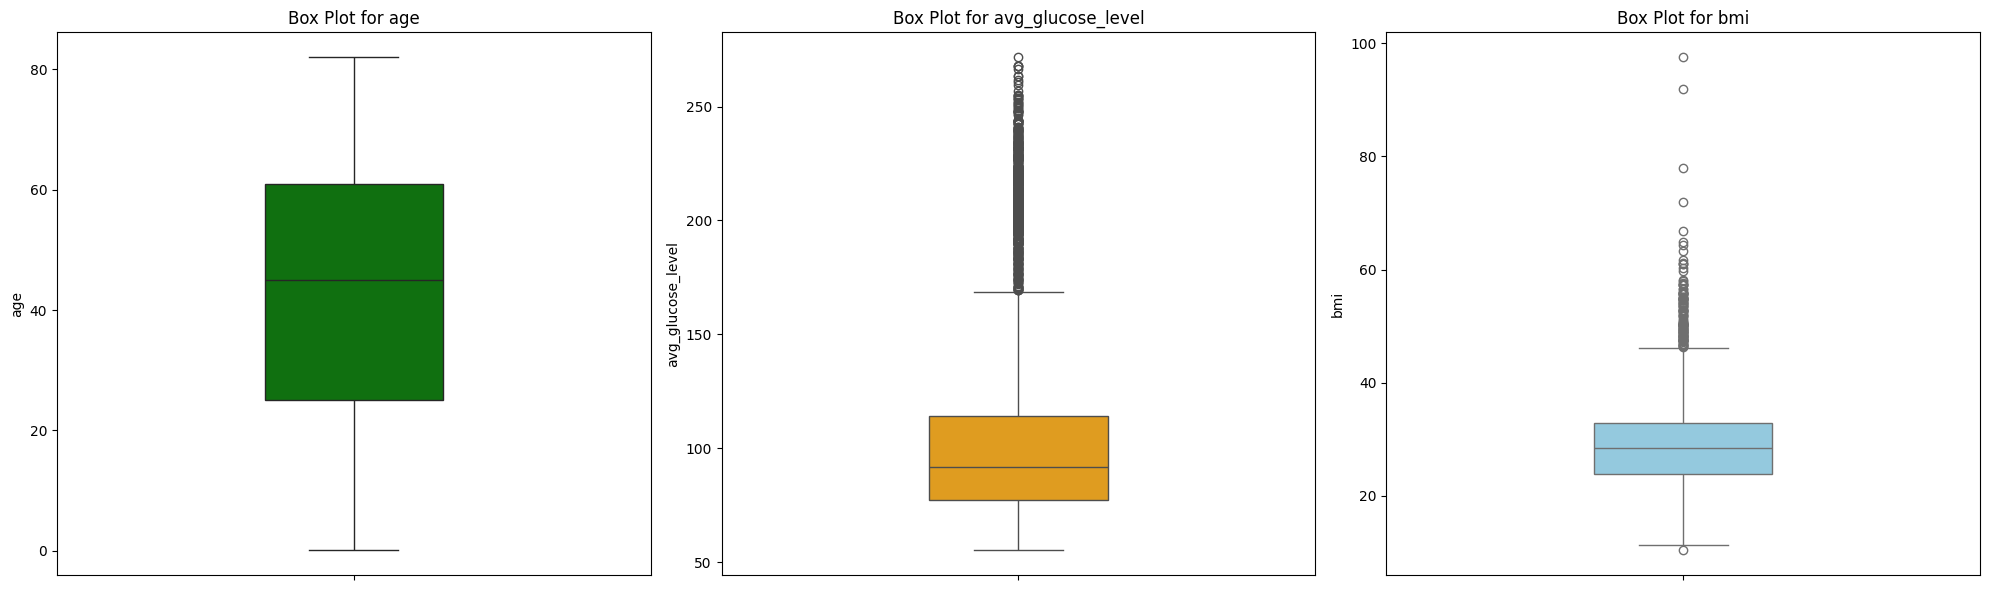

In [543]:
# Box Plots for numerical features to visualize if there are outliers

# Select numerical features
numerical_columns = df.select_dtypes(exclude=['object', 'int']).columns

# Create a figure with 13 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

axes = axes.flatten()

# Define Colors
colors = ['green', 'orange', 'skyblue']

# Iterate over each numerical column and plot a Box Plot
for i, column in enumerate(numerical_columns):
    sns.boxplot(df[column], ax=axes[i], color=colors[i], width=0.3)
    axes[i].set_title(f"Box Plot for {column}")
    axes[i].set_ylabel(f"{column}")

plt.tight_layout()
plt.show()

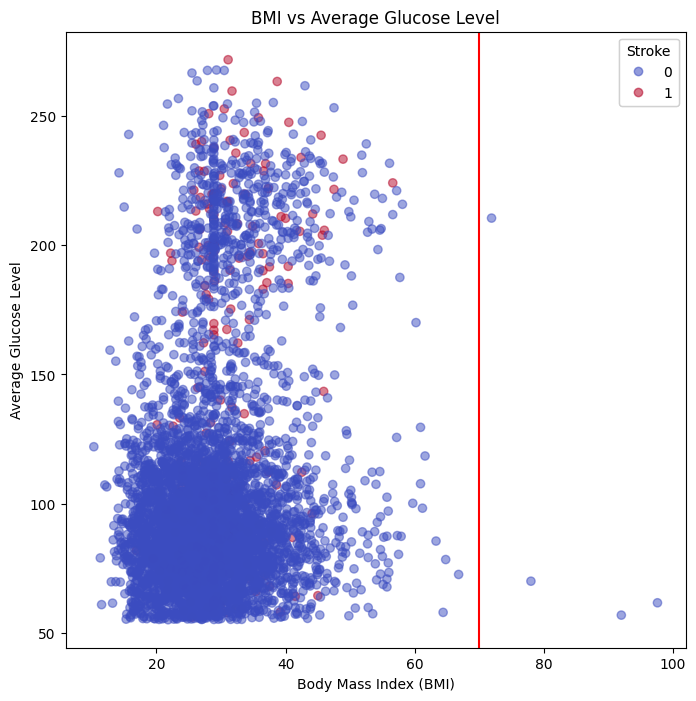

In [545]:
# Three Option:
    # 1. Graphic method with a Scatter Plot
    # 2. The interquartile range (IQR) method
    # 3. The percentile method with 0.001 and 0.999

# 1. Scatter plot using the two features with outliers: bmi and avg_glucose_level

# Create a scatter plot with points colored according to the stroke feature
fig, ax = plt.subplots(figsize=(8, 8))
scatter = ax.scatter(df['bmi'], df['avg_glucose_level'], c=df['stroke'], cmap='coolwarm', alpha=0.5)
ax.axvline(70, color='red')

legend1 = ax.legend(*scatter.legend_elements(), title='Stroke')
ax.add_artist(legend1)

ax.set_title('BMI vs Average Glucose Level')
ax.set_xlabel('Body Mass Index (BMI)')
ax.set_ylabel('Average Glucose Level')

plt.show()

In [546]:
# 2. The interquartile range (IQR) method for bmi feature

feature = 'bmi'
#feature = 'avg_glucose_level'

# Calculate the upper and lower limits
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of indexes of the outlier rows
upper_array = np.where(df[feature] >= upper)[0]
lower_array = np.where(df[feature] <= lower)[0]

print(f'len of lower excluded {len(lower_array)}\nlen of upper excluded {len(upper_array)}')
 
""" # Removing the outliers
print("Old Shape: ", df.shape)

df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", df.shape) """

len of lower excluded 1
len of upper excluded 125


' # Removing the outliers\ndf.drop(index=upper_array, inplace=True)\ndf.drop(index=lower_array, inplace=True)\n \n# Print the new shape of the DataFrame\nprint("New Shape: ", df.shape) '

In [5]:
#3. The percentile method with 0.001 and 0.999

feature = 'bmi'

min_thre = df[feature].quantile(0.001)
max_thre = df[feature].quantile(0.999)
min_ex = len(df[df['bmi']<min_thre])
max_ex = len(df[df['bmi']>max_thre])

print(f'len of min excluded {min_ex}\nlen of max excluded {max_ex}')

""" # Removing the outliers
print("Old Shape: ", df.shape)

df.drop(index=df[df['bmi']<min_thre].index, inplace=True)
df.drop(index=df[df['bmi']>max_thre].index, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", df.shape) """

len of min excluded 6
len of max excluded 6


' # Removing the outliers\nprint("Old Shape: ", df.shape)\n\ndf.drop(index=df[df[\'bmi\']<min_thre].index, inplace=True)\ndf.drop(index=df[df[\'bmi\']>max_thre].index, inplace=True)\n \n# Print the new shape of the DataFrame\nprint("New Shape: ", df.shape) '

In [6]:
# Conclusion:
    # 1. Easy and fast method, but too arbitrary 
    # 2. The most theoretical method, but too severe because it drops more than 100 samples 
    # 3. The most balanced and theoretical choice, we would loose some information from below but not too much

# We can use the third option:

print("Old Shape: ", df.shape)

df.drop(index=df[df['bmi']<min_thre].index, inplace=True)
df.drop(index=df[df['bmi']>max_thre].index, inplace=True)

df.reset_index(drop=True, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", df.shape)

Old Shape:  (5109, 11)
New Shape:  (5097, 11)


## FEATURE CORRELATION 

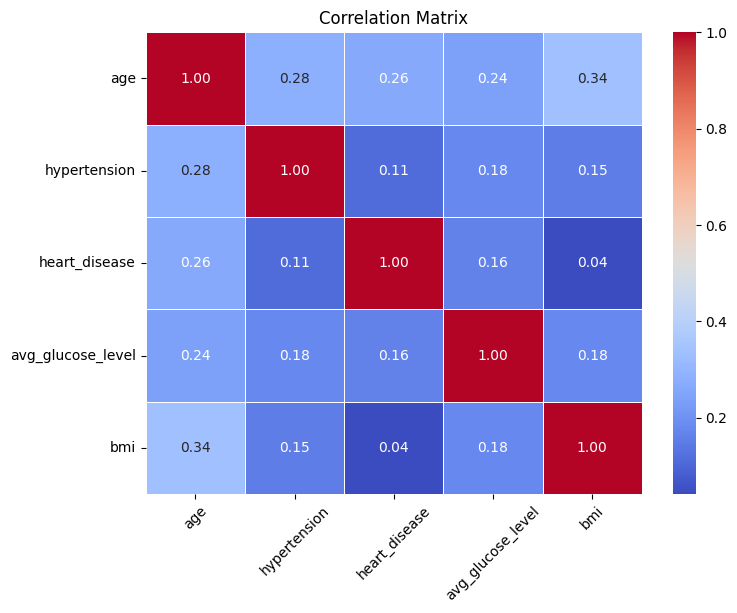

In [559]:
# Observing Feature Correlation through the use of Heat Map

# Consider just numerical and discrete features, excluding 
numerical_columns = df.drop('stroke', axis=1).select_dtypes(exclude='object').columns

corr_matrix = df[numerical_columns].corr()

fig = plt.figure(figsize=(8,6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.xticks(rotation= 45)

plt.show()

In [563]:
# (JUST FOR CURIOSITY) Encode categorical features so to have a complete correlation matrix

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Choose Categorical features
categorical_columns = df.select_dtypes(include='object').columns

# Encode categorical feature
df_new = df.copy()
for column in categorical_columns:
    df_new[column] = label_encoder.fit_transform(df[column])

#df_new

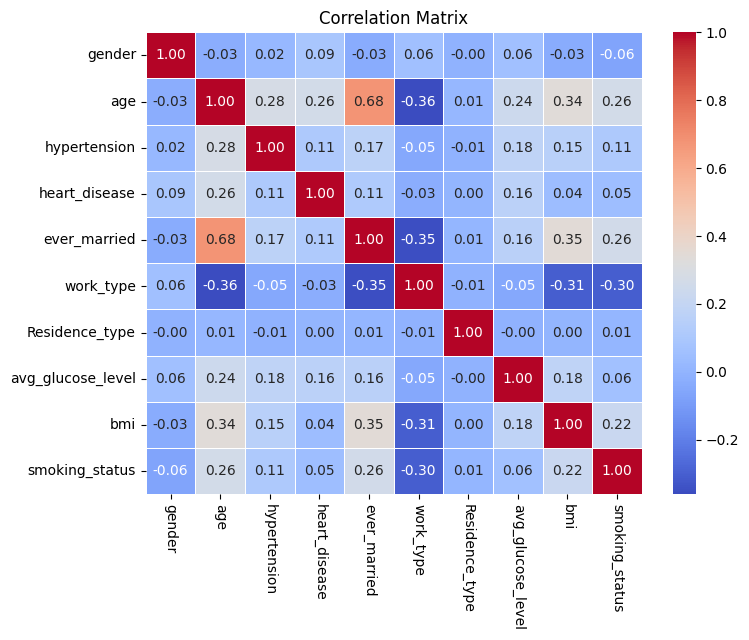

In [567]:
# Complete Correlation Matrix and Heat Map

corr_matrix = df_new.drop('stroke', axis=1).corr()

fig = plt.figure(figsize=(8,6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.xticks(rotation = -90)

plt.show()

# Conclusion:
    # There aren't clear correlated features
    # The only two slight correlated features are age and ever_married: as expected

## NORMALIZATION

In [7]:
# Evaluate some Normalization and Standardization techniques

# Inizialize Scaler or Normalizer

#scaler = MinMaxScaler()
scaler = StandardScaler()
#scaler = RobustScaler()
#scaler = Normalizer(norm='l2')

df_norm = df.copy()

df_norm['bmi'] = scaler.fit_transform(df_norm[['bmi']])
df_norm['avg_glucose_level'] = scaler.fit_transform(df_norm[['avg_glucose_level']])
df_norm['age'] = scaler.fit_transform(df_norm[['age']])

df_norm.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5.097000e+03,5097.000000,5097.000000,5.097000e+03,5.097000e+03,5097.000000
mean,1.449803e-16,0.097116,0.054149,-8.364246e-17,4.711859e-16,0.048852
std,1.000098e+00,0.296145,0.226335,1.000098e+00,1.000098e+00,0.215580
min,-1.910743e+00,0.000000,0.000000,-1.127131e+00,-2.119606e+00,0.000000
25%,-8.080542e-01,0.000000,0.000000,-6.377436e-01,-6.759089e-01,0.000000
50%,7.692875e-02,0.000000,0.000000,-3.150925e-01,-6.100091e-02,0.000000
75%,7.849151e-01,0.000000,0.000000,1.751781e-01,5.271719e-01,0.000000
max,1.714147e+00,1.000000,1.000000,3.656762e+00,4.751322e+00,1.000000


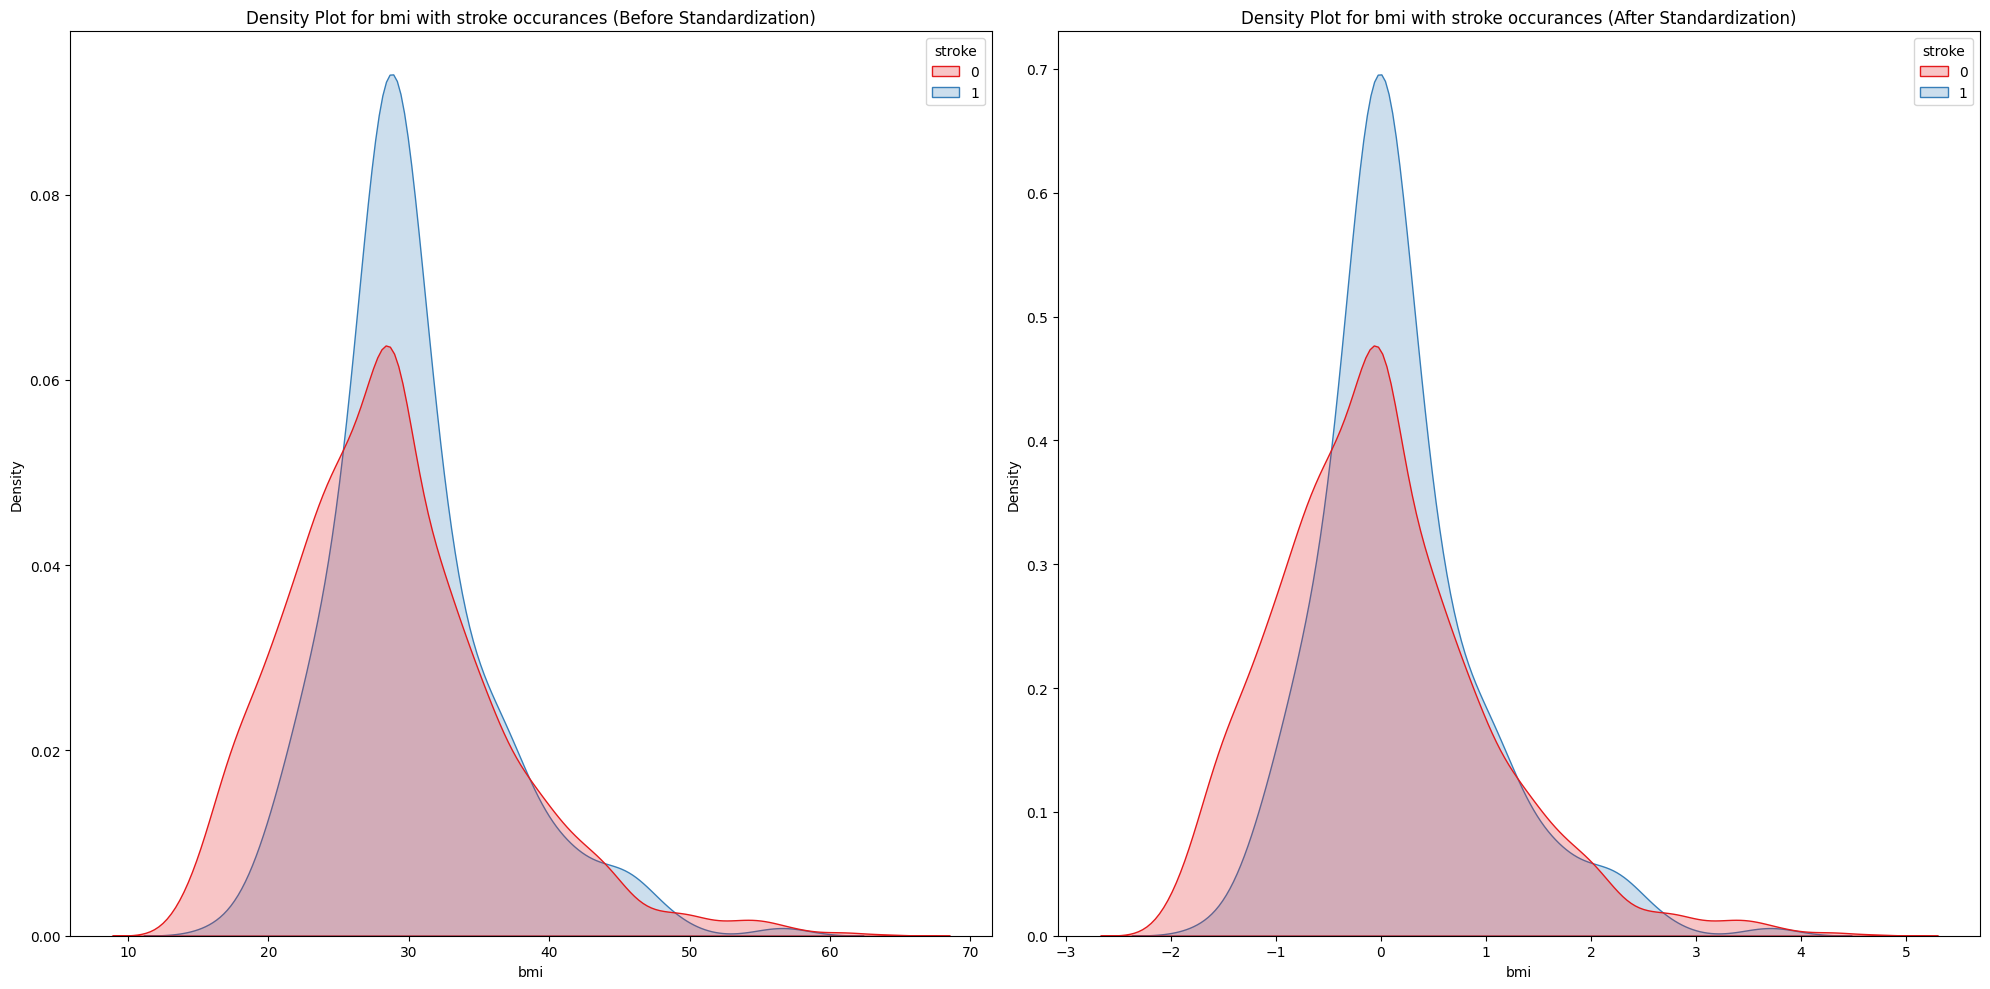

In [579]:
# Density plot one feature for each 'stroke' category, before and after standardization

feature = 'bmi'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,10))

sns.kdeplot(data=df, x=feature, hue='stroke', fill=True, common_norm=False, palette="Set1", ax=axes[0])
axes[0].set_title(f'Density Plot for {feature} with stroke occurances (Before Standardization)')
axes[0].set_xlabel(f'{feature}')
axes[0].set_ylabel('Density')

sns.kdeplot(data=df_norm, x=feature, hue='stroke', fill=True, common_norm=False, palette="Set1", ax=axes[1])
axes[1].set_title(f'Density Plot for {feature} with stroke occurances (After Standardization)')
axes[1].set_xlabel(f'{feature}')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

## ENCODE CATEGORICAL FEATURES

In [8]:
# Encode categorical features for future machine learning steps and prediction phase

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Choose Categorical features
categorical_columns = df.select_dtypes(include='object').columns

# Encode categorical feature
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    df_norm[column] = label_encoder.fit_transform(df_norm[column])

#df[categorical_columns]  
df_norm[categorical_columns]  

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,1
1,0,1,3,0,2
2,1,1,2,0,2
3,0,1,2,1,3
4,0,1,3,0,2
...,...,...,...,...,...
5092,0,1,2,1,2
5093,0,1,3,1,2
5094,0,1,3,0,2
5095,1,1,2,0,1


## SAVE MODIFIED DATASETS

In [9]:
# Save the dataset and the normalized dataset in a new folder

df.to_csv('dataset_after_eda/Dataset_after_eda.csv', index=False)  
df_norm.to_csv('dataset_after_eda/Normalized_dataset_after_eda.csv', index=False)